In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 14410

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 5e-6,
    'sigma_y': 5e-6,
    'z0x': 70,
    'z0y': 70,
    'rangeFactor': 5,
    'scaleFactor': 5
}

In [4]:
b1 = beam.Beam(beam_params=beam_params)

# mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
# mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

alphaAsym = 78.4*np.pi/180

slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)

crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=E0,
                          alphaAsym=-alphaAsym, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.1, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.4, E0=E0,alphaAsym=alphaAsym, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.5, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

# crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
# crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
# slit = optics.Slit('slit', z=990.6, x_width=30e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

# IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=slit.z + .05, N=256)

YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [slit, upstream_YAG, downstream_YAG, YAG_mid, crystal1,crystal2,crystal3,crystal4]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal1.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 452.5377238973496 microns
FWHM in y: 452.5377238973496 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127086721417121
0.9127086721417121
b 0.10
b 0.10
b 9.45
b 9.45
9.913947231986581
158.87992629821076
2.1844263366348096
(array([0., 0., 0.]), array([ 0.36049282,  0.        , -0.93276199]))
3.452485144369975e-06


In [7]:
crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=14410,
                          alphaAsym=78.4*np.pi/180, orientation=2,pol='p')
print(np.sin(crystal1.beta0)/np.sin(crystal1.alpha))
print(crystal2.beta0*180/np.pi)
print(crystal3.beta0*180/np.pi)
print(crystal4.beta0*180/np.pi)

b 9.45
0.10578322154207039
158.86953520612
2.1844263366348096
2.1844263366348096


slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.96
zy: 70.10
drift3
zx: -12068.86
zy: 70.20
c2
zx: 2077739.29
zy: 70.20
drift4
zx: 2077739.39
zy: 70.30
YAG_mid
zx: 2077739.39
zy: 70.30
drift5
zx: 2077739.59
zy: 70.50
c3
zx: -14283.84
zy: 70.50
drift6
zx: -14283.74
zy: 70.60
c4
zx: 97.32
zy: 70.60
drift7
zx: 103.82
zy: 77.10
YAG2
zx: 103.82
zy: 77.10


<IPython.core.display.Javascript object>


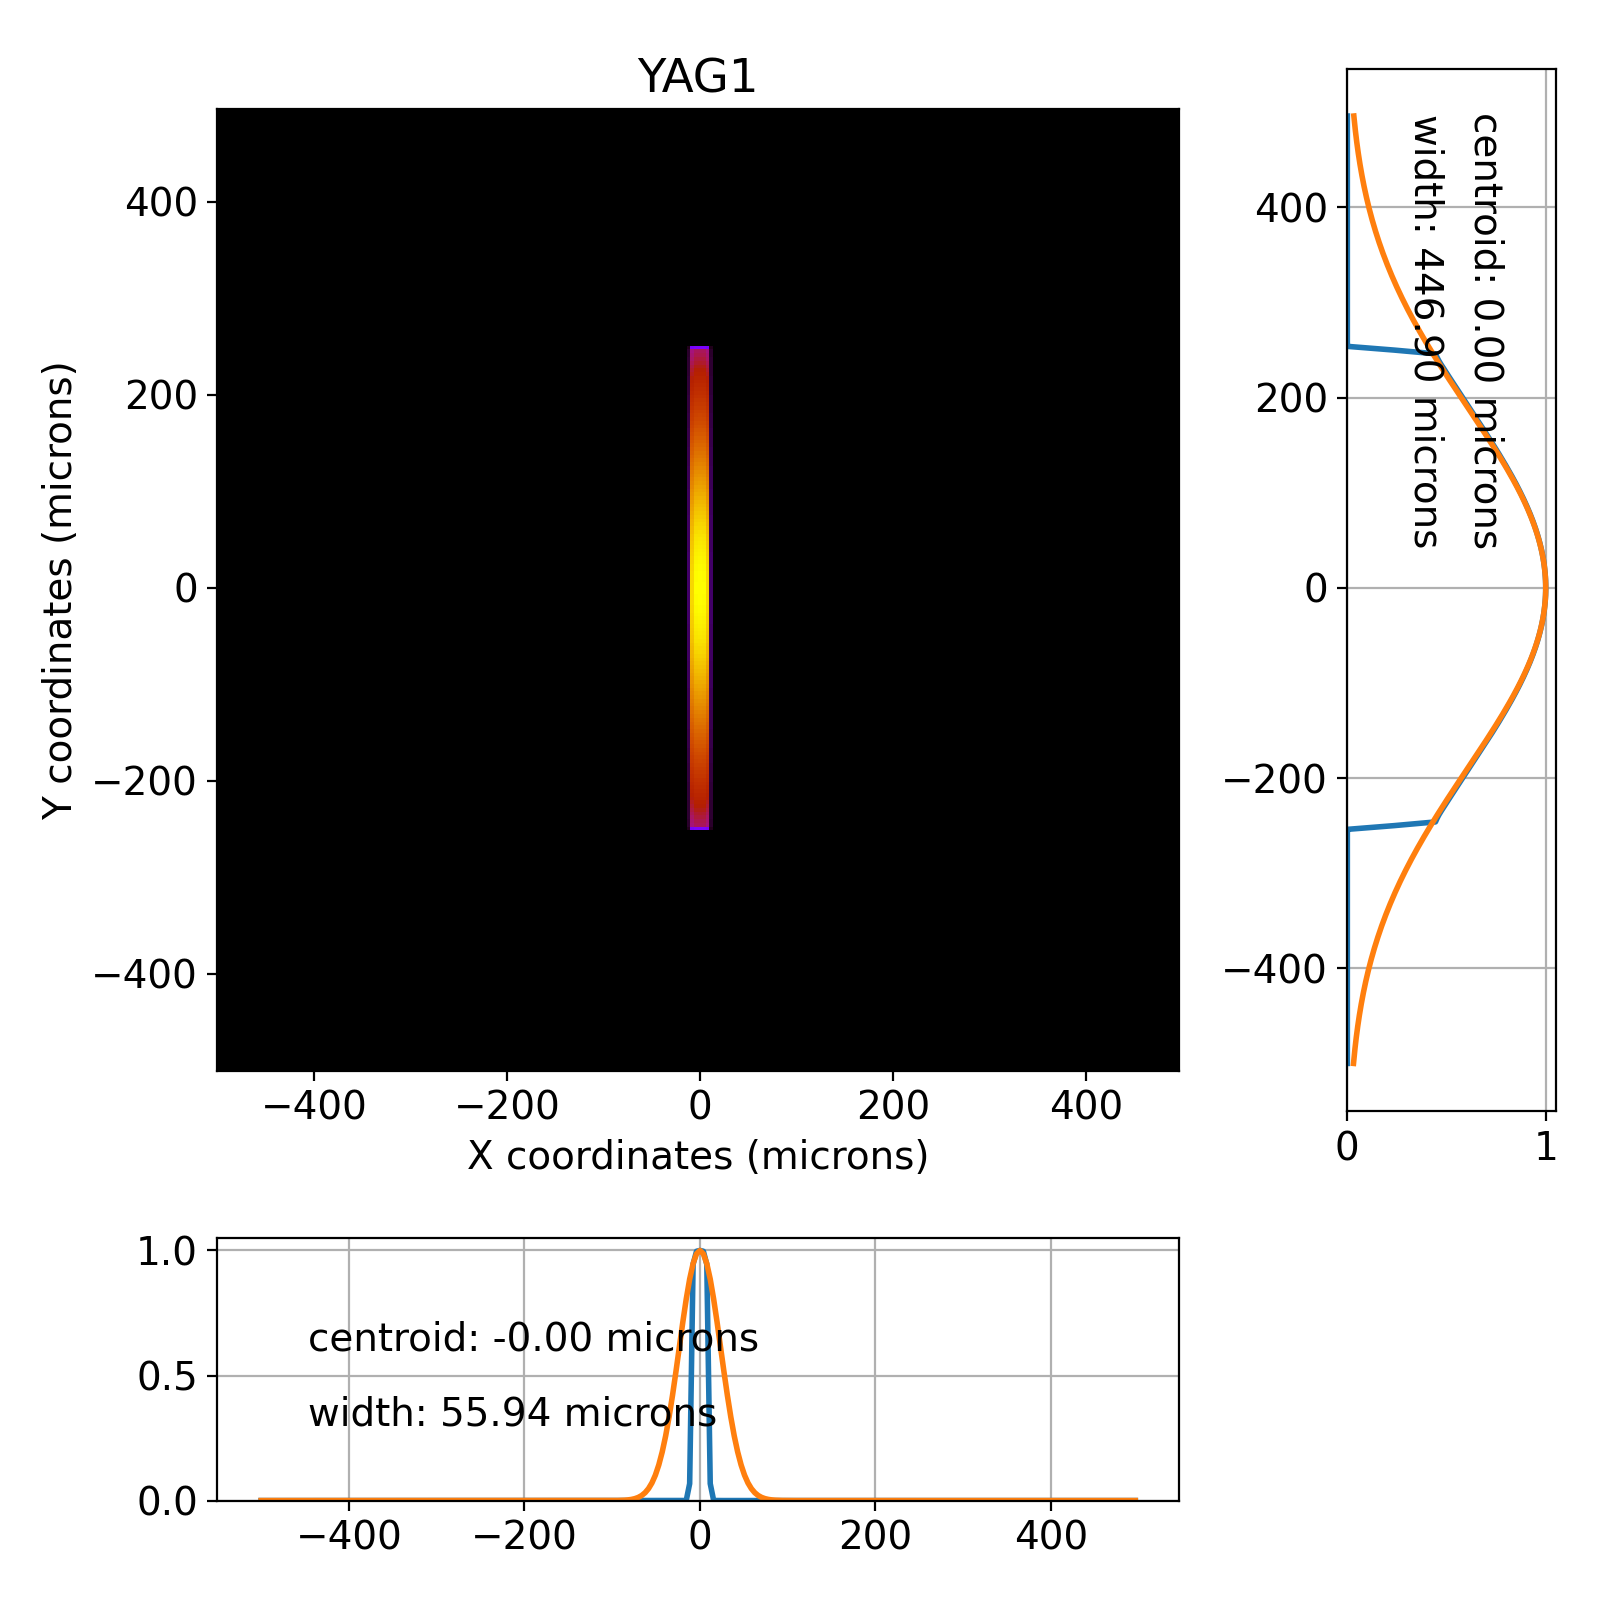

<IPython.core.display.Javascript object>


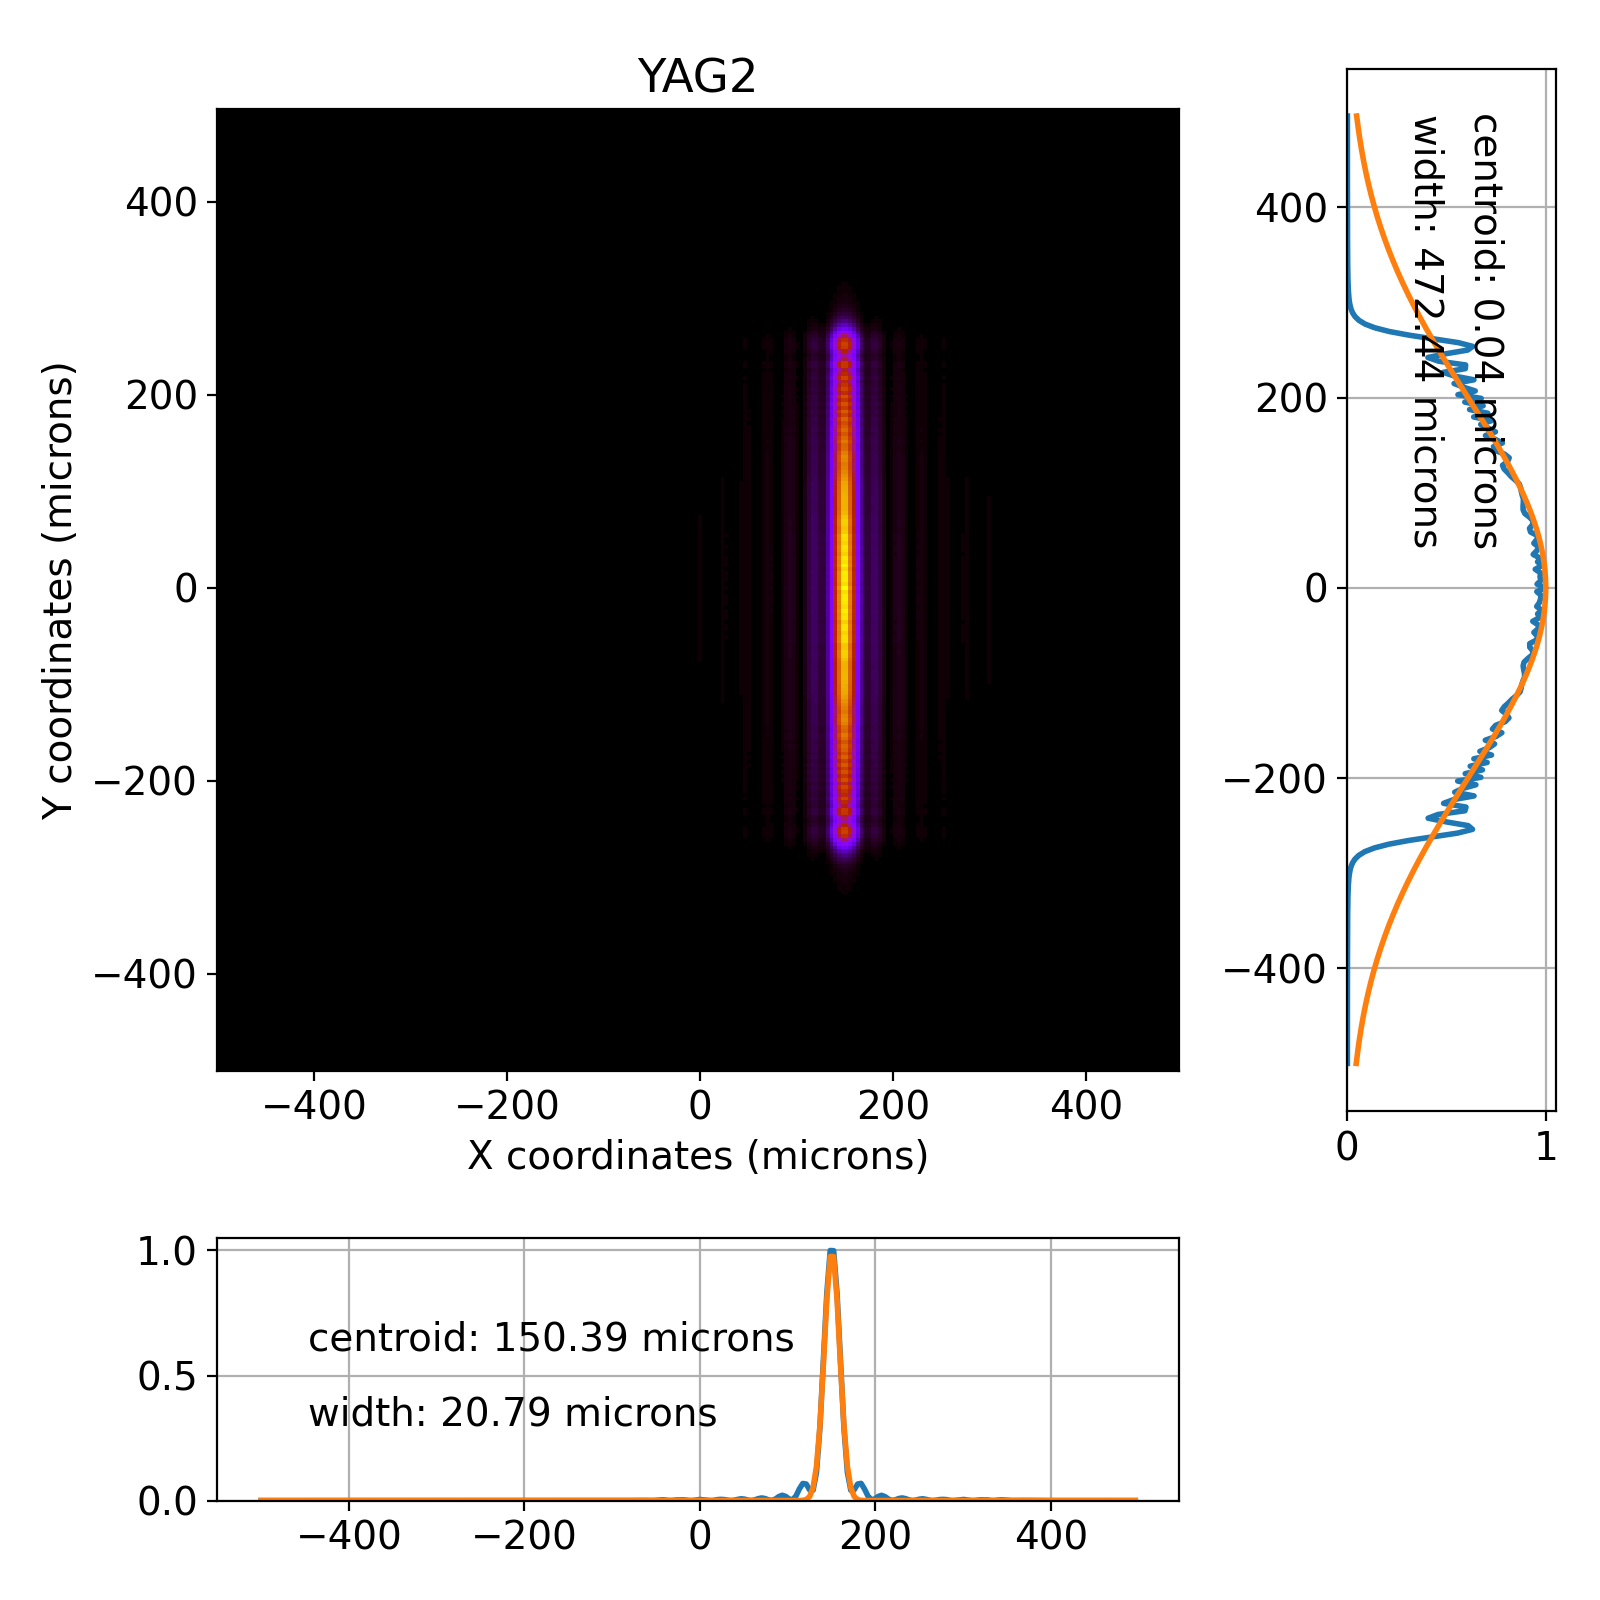

<IPython.core.display.Javascript object>


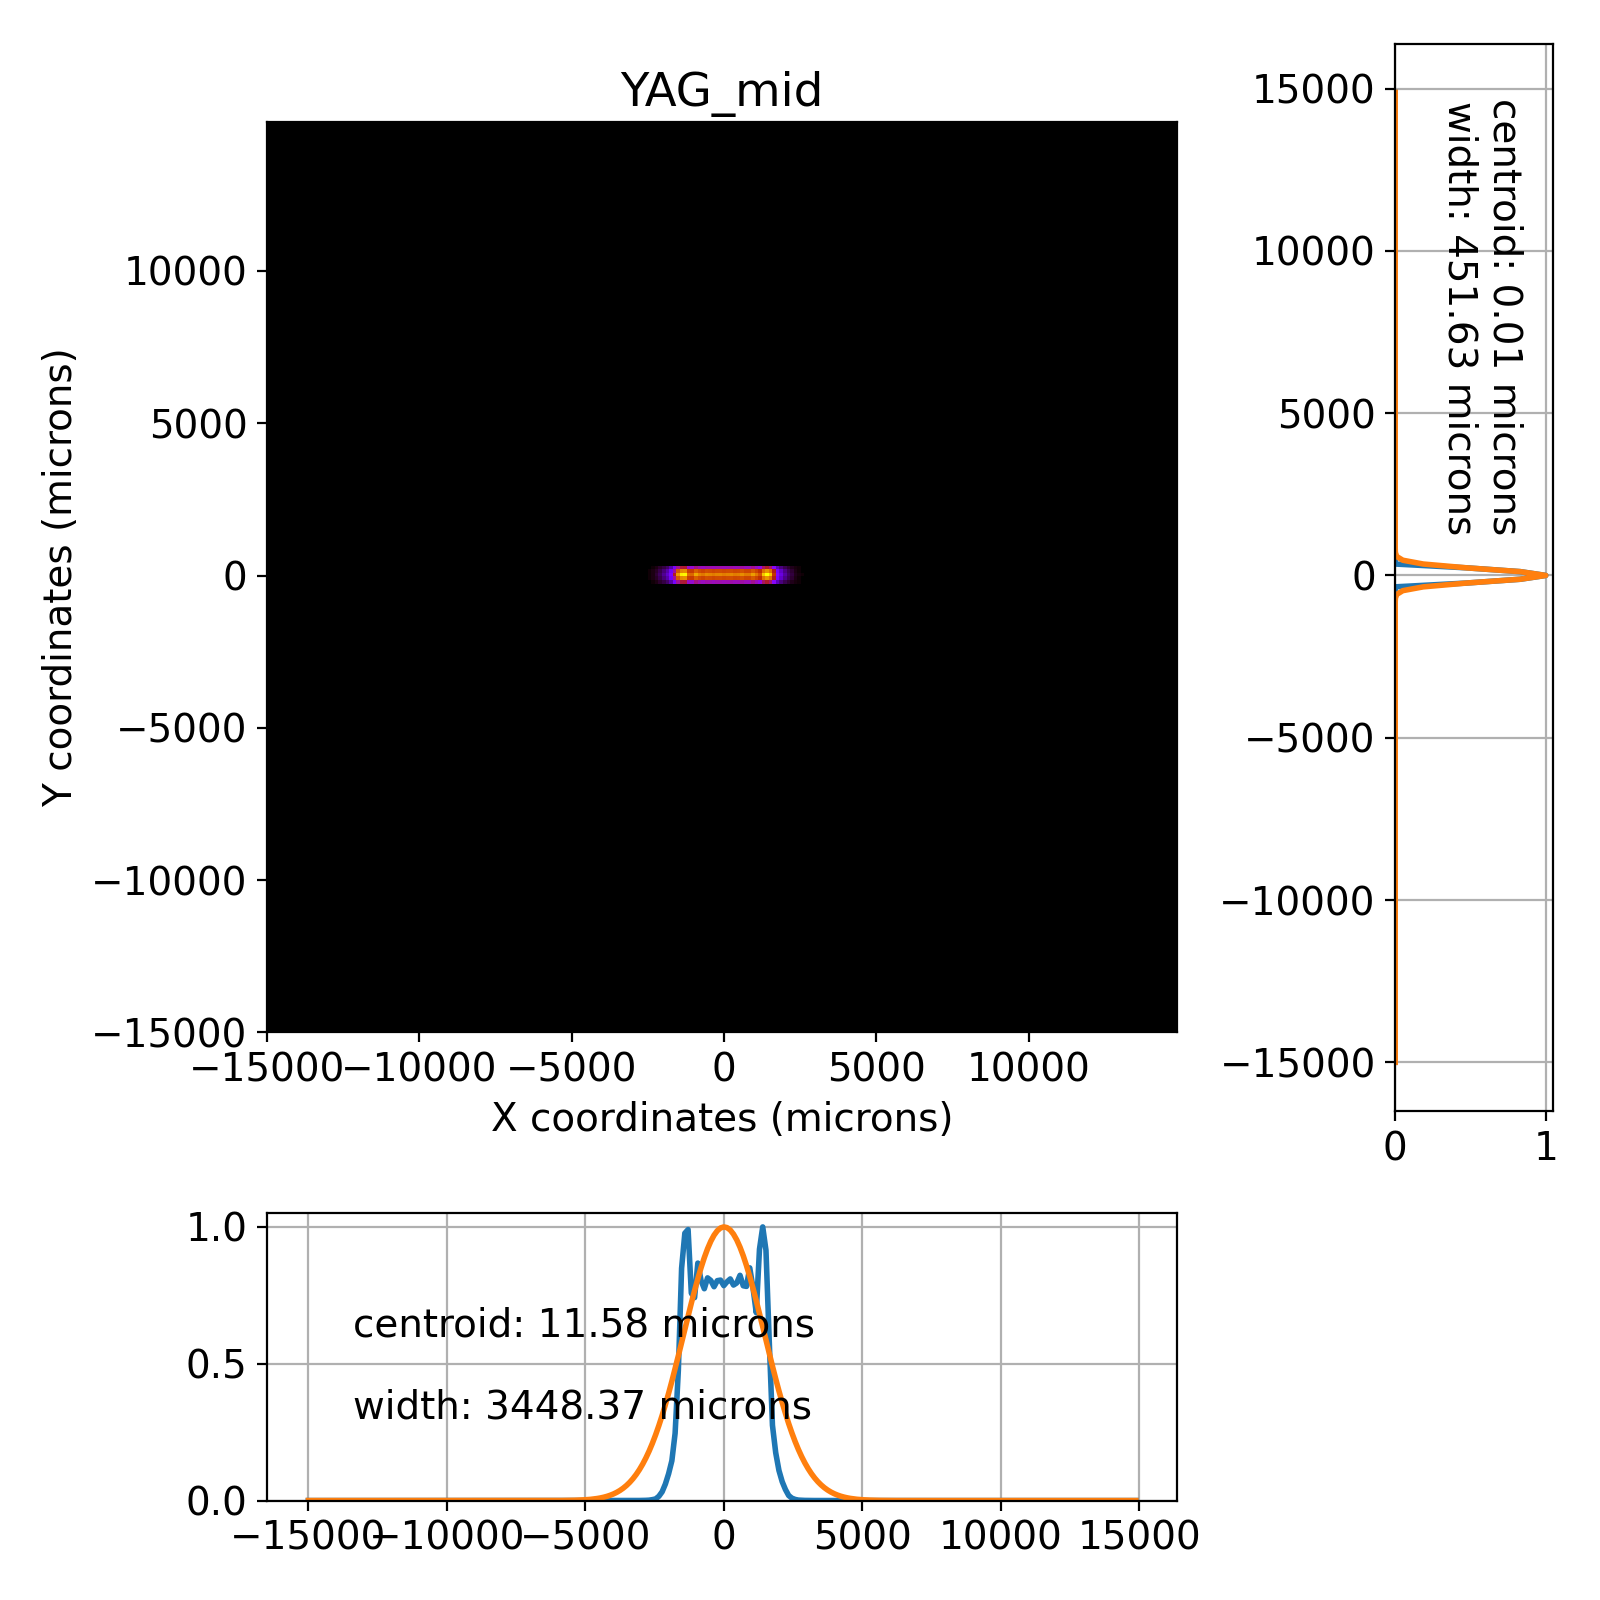

<IPython.core.display.Javascript object>


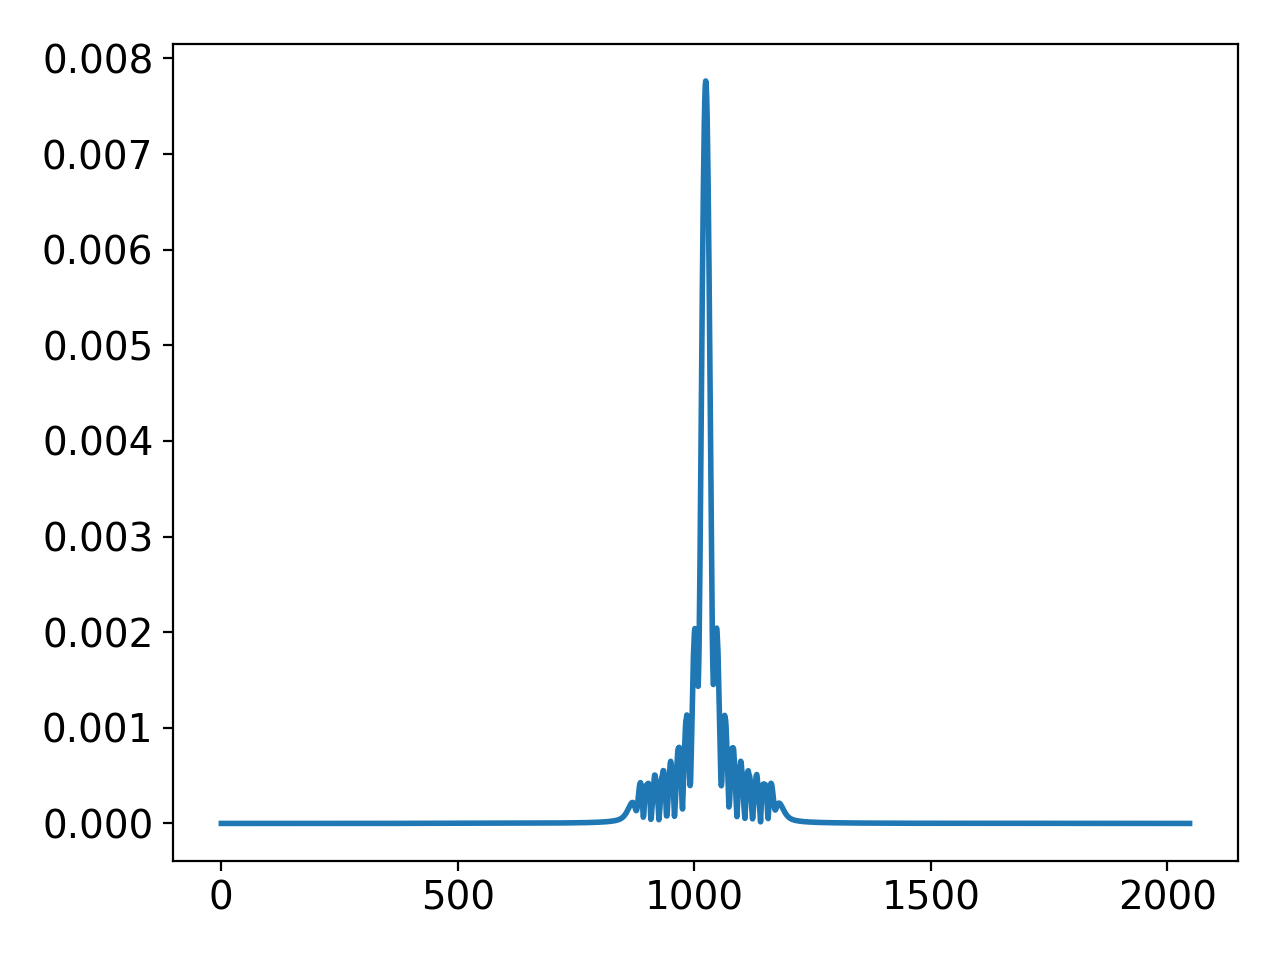

In [50]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.YAG2.view_beam()
XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [51]:
beam_params['photonEnergy'] = 14410

pulse_test = beam.Pulse(beam_params=beam_params, tau=1000, time_window=80000)

In [52]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1', 'YAG2','YAG_mid'])

FWHM in x: 452.5378698977267 microns
FWHM in y: 452.5378698977267 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127083776283166
0.9127083776283166
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.85
zy: 70.10
drift3
zx: -12068.75
zy: 70.20
c2
zx: 2077959.37
zy: 70.20
drift4
zx: 2077959.47
zy: 70.30
YAG_mid
zx: 2077959.47
zy: 70.30
drift5
zx: 2077959.67
zy: 70.50
c3
zx: -14284.14
zy: 70.50
drift6
zx: -14284.04
zy: 70.60
c4
zx: 99.05
zy: 70.60
drift7
zx: 105.55
zy: 77.10
YAG2
zx: 105.55
zy: 77.10
FWHM in x: 452.5378682572724 microns
FWHM in y: 452.5378682572724 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127083809374559
0.9127083809374559
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.85
zy: 70.10
drift3
zx: -12068.75
zy: 70.20
c2
zx: 2077958.19
zy: 70.20
drift4
zx: 2077958.29
zy: 70.30
YAG_mid
zx: 

zx: 105.40
zy: 77.10
FWHM in x: 452.5378420100069 microns
FWHM in y: 452.5378420100069 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127084338836843
0.9127084338836843
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.86
zy: 70.10
drift3
zx: -12068.76
zy: 70.20
c2
zx: 2077938.39
zy: 70.20
drift4
zx: 2077938.49
zy: 70.30
YAG_mid
zx: 2077938.49
zy: 70.30
drift5
zx: 2077938.69
zy: 70.50
c3
zx: -14284.11
zy: 70.50
drift6
zx: -14284.01
zy: 70.60
c4
zx: 98.89
zy: 70.60
drift7
zx: 105.39
zy: 77.10
YAG2
zx: 105.39
zy: 77.10
FWHM in x: 452.5378403695529 microns
FWHM in y: 452.5378403695529 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127084371928235
0.9127084371928235
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.86
zy: 70.10
drift3
zx: -12068.76
zy: 70.20
c2
zx: 2077937.15
zy: 70.20
drift4
zx: 2077937.25
z

zx: -14283.99
zy: 70.60
c4
zx: 98.75
zy: 70.60
drift7
zx: 105.25
zy: 77.10
YAG2
zx: 105.25
zy: 77.10
FWHM in x: 452.53781576274446 microns
FWHM in y: 452.53781576274446 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127084868299125
0.9127084868299125
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.87
zy: 70.10
drift3
zx: -12068.77
zy: 70.20
c2
zx: 2077918.54
zy: 70.20
drift4
zx: 2077918.64
zy: 70.30
YAG_mid
zx: 2077918.64
zy: 70.30
drift5
zx: 2077918.84
zy: 70.50
c3
zx: -14284.08
zy: 70.50
drift6
zx: -14283.98
zy: 70.60
c4
zx: 98.74
zy: 70.60
drift7
zx: 105.24
zy: 77.10
YAG2
zx: 105.24
zy: 77.10
FWHM in x: 452.53781412229057 microns
FWHM in y: 452.53781412229057 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127084901390519
0.9127084901390519
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.87
zy: 70.1

zx: 2077897.62
zy: 70.20
drift4
zx: 2077897.72
zy: 70.30
YAG_mid
zx: 2077897.72
zy: 70.30
drift5
zx: 2077897.92
zy: 70.50
c3
zx: -14284.06
zy: 70.50
drift6
zx: -14283.96
zy: 70.60
c4
zx: 98.57
zy: 70.60
drift7
zx: 105.07
zy: 77.10
YAG2
zx: 105.07
zy: 77.10
FWHM in x: 452.53778623457765 microns
FWHM in y: 452.53778623457765 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127085463944197
0.9127085463944197
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.88
zy: 70.10
drift3
zx: -12068.78
zy: 70.20
c2
zx: 2077896.27
zy: 70.20
drift4
zx: 2077896.37
zy: 70.30
YAG_mid
zx: 2077896.37
zy: 70.30
drift5
zx: 2077896.57
zy: 70.50
c3
zx: -14284.05
zy: 70.50
drift6
zx: -14283.95
zy: 70.60
c4
zx: 98.56
zy: 70.60
drift7
zx: 105.06
zy: 77.10
YAG2
zx: 105.06
zy: 77.10
FWHM in x: 452.5377845941242 microns
FWHM in y: 452.5377845941242 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.91270854970

zx: -12068.79
zy: 70.20
c2
zx: 2077877.76
zy: 70.20
drift4
zx: 2077877.86
zy: 70.30
YAG_mid
zx: 2077877.86
zy: 70.30
drift5
zx: 2077878.06
zy: 70.50
c3
zx: -14284.03
zy: 70.50
drift6
zx: -14283.93
zy: 70.60
c4
zx: 98.42
zy: 70.60
drift7
zx: 104.92
zy: 77.10
YAG2
zx: 104.92
zy: 77.10
FWHM in x: 452.5377599873217 microns
FWHM in y: 452.5377599873217 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127085993406481
0.9127085993406481
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.89
zy: 70.10
drift3
zx: -12068.79
zy: 70.20
c2
zx: 2077876.51
zy: 70.20
drift4
zx: 2077876.61
zy: 70.30
YAG_mid
zx: 2077876.61
zy: 70.30
drift5
zx: 2077876.81
zy: 70.50
c3
zx: -14284.03
zy: 70.50
drift6
zx: -14283.93
zy: 70.60
c4
zx: 98.41
zy: 70.60
drift7
zx: 104.91
zy: 77.10
YAG2
zx: 104.91
zy: 77.10
FWHM in x: 452.53775834686843 microns
FWHM in y: 452.53775834686843 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence 

slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.90
zy: 70.10
drift3
zx: -12068.80
zy: 70.20
c2
zx: 2077856.74
zy: 70.20
drift4
zx: 2077856.84
zy: 70.30
YAG_mid
zx: 2077856.84
zy: 70.30
drift5
zx: 2077857.04
zy: 70.50
c3
zx: -14284.00
zy: 70.50
drift6
zx: -14283.90
zy: 70.60
c4
zx: 98.25
zy: 70.60
drift7
zx: 104.75
zy: 77.10
YAG2
zx: 104.75
zy: 77.10
FWHM in x: 452.5377320996155 microns
FWHM in y: 452.5377320996155 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127086555960157
0.9127086555960157
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.90
zy: 70.10
drift3
zx: -12068.80
zy: 70.20
c2
zx: 2077855.51
zy: 70.20
drift4
zx: 2077855.61
zy: 70.30
YAG_mid
zx: 2077855.61
zy: 70.30
drift5
zx: 2077855.81
zy: 70.50
c3
zx: -14284.00
zy: 70.50
drift6
zx: -14283.90
zy: 70.60
c4
zx: 98.24
zy: 70.60
drift7
zx: 104.74
zy: 77.10
YAG2
zx: 1

slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.91
zy: 70.10
drift3
zx: -12068.81
zy: 70.20
c2
zx: 2077838.16
zy: 70.20
drift4
zx: 2077838.26
zy: 70.30
YAG_mid
zx: 2077838.26
zy: 70.30
drift5
zx: 2077838.46
zy: 70.50
c3
zx: -14283.98
zy: 70.50
drift6
zx: -14283.88
zy: 70.60
c4
zx: 98.11
zy: 70.60
drift7
zx: 104.61
zy: 77.10
YAG2
zx: 104.61
zy: 77.10
FWHM in x: 452.5377074928188 microns
FWHM in y: 452.5377074928188 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127087052331048
0.9127087052331048
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.91
zy: 70.10
drift3
zx: -12068.81
zy: 70.20
c2
zx: 2077836.96
zy: 70.20
drift4
zx: 2077837.06
zy: 70.30
YAG_mid
zx: 2077837.06
zy: 70.30
drift5
zx: 2077837.26
zy: 70.50
c3
zx: -14283.97
zy: 70.50
drift6
zx: -14283.87
zy: 70.60
c4
zx: 98.10
zy: 70.60
drift7
zx: 104.60
zy: 77.10
YAG2
zx: 1

zx: 97.95
zy: 70.60
drift7
zx: 104.45
zy: 77.10
YAG2
zx: 104.45
zy: 77.10
FWHM in x: 452.53768124557195 microns
FWHM in y: 452.53768124557195 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127087581793334
0.9127087581793334
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.92
zy: 70.10
drift3
zx: -12068.82
zy: 70.20
c2
zx: 2077817.21
zy: 70.20
drift4
zx: 2077817.31
zy: 70.30
YAG_mid
zx: 2077817.31
zy: 70.30
drift5
zx: 2077817.51
zy: 70.50
c3
zx: -14283.95
zy: 70.50
drift6
zx: -14283.85
zy: 70.60
c4
zx: 97.94
zy: 70.60
drift7
zx: 104.44
zy: 77.10
YAG2
zx: 104.44
zy: 77.10
FWHM in x: 452.5376796051192 microns
FWHM in y: 452.5376796051192 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127087614884725
0.9127087614884725
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.92
zy: 70.10
drift3
zx: -12068.82
zy: 70

zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.93
zy: 70.10
drift3
zx: -12068.83
zy: 70.20
c2
zx: 2077797.42
zy: 70.20
drift4
zx: 2077797.52
zy: 70.30
YAG_mid
zx: 2077797.52
zy: 70.30
drift5
zx: 2077797.72
zy: 70.50
c3
zx: -14283.92
zy: 70.50
drift6
zx: -14283.82
zy: 70.60
c4
zx: 97.78
zy: 70.60
drift7
zx: 104.28
zy: 77.10
YAG2
zx: 104.28
zy: 77.10
FWHM in x: 452.5376533578755 microns
FWHM in y: 452.5376533578755 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.912708814434701
0.912708814434701
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.93
zy: 70.10
drift3
zx: -12068.83
zy: 70.20
c2
zx: 2077796.11
zy: 70.20
drift4
zx: 2077796.21
zy: 70.30
YAG_mid
zx: 2077796.21
zy: 70.30
drift5
zx: 2077796.41
zy: 70.50
c3
zx: -14283.92
zy: 70.50
drift6
zx: -14283.82
zy: 70.60
c4
zx: 97.77
zy: 70.60
drift7
zx: 104.27
zy: 77.10
YAG2
zx: 104.27
zy: 77.10
FWHM in x: 452.537

slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.94
zy: 70.10
drift3
zx: -12068.84
zy: 70.20
c2
zx: 2077777.61
zy: 70.20
drift4
zx: 2077777.71
zy: 70.30
YAG_mid
zx: 2077777.71
zy: 70.30
drift5
zx: 2077777.91
zy: 70.50
c3
zx: -14283.89
zy: 70.50
drift6
zx: -14283.79
zy: 70.60
c4
zx: 97.63
zy: 70.60
drift7
zx: 104.13
zy: 77.10
YAG2
zx: 104.13
zy: 77.10
FWHM in x: 452.5376271106349 microns
FWHM in y: 452.5376271106349 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127088673809295
0.9127088673809295
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.94
zy: 70.10
drift3
zx: -12068.84
zy: 70.20
c2
zx: 2077776.40
zy: 70.20
drift4
zx: 2077776.50
zy: 70.30
YAG_mid
zx: 2077776.50
zy: 70.30
drift5
zx: 2077776.70
zy: 70.50
c3
zx: -14283.89
zy: 70.50
drift6
zx: -14283.79
zy: 70.60
c4
zx: 97.62
zy: 70.60
drift7
zx: 104.12
zy: 77.10
YAG2
zx: 1

zx: 103.97
zy: 77.10
FWHM in x: 452.53760086339736 microns
FWHM in y: 452.53760086339736 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.9127089203271578
0.9127089203271578
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.95
zy: 70.10
drift3
zx: -12068.85
zy: 70.20
c2
zx: 2077756.56
zy: 70.20
drift4
zx: 2077756.66
zy: 70.30
YAG_mid
zx: 2077756.66
zy: 70.30
drift5
zx: 2077756.86
zy: 70.50
c3
zx: -14283.87
zy: 70.50
drift6
zx: -14283.77
zy: 70.60
c4
zx: 97.46
zy: 70.60
drift7
zx: 103.96
zy: 77.10
YAG2
zx: 103.96
zy: 77.10
FWHM in x: 452.5375992229452 microns
FWHM in y: 452.5375992229452 microns
FWHM Divergence (x): 6.5 μrad
FWHM Divergence (y): 6.5 μrad
0.912708923636297
0.912708923636297
slit
zx: 70.00
zy: 70.00
drift1
zx: 70.05
zy: 70.05
YAG1
zx: 70.05
zy: 70.05
drift2
zx: 70.10
zy: 70.10
c1
zx: -12068.95
zy: 70.10
drift3
zx: -12068.85
zy: 70.20
c2
zx: 2077755.35
zy: 70.20
drift4
zx: 2077755.45
z

<IPython.core.display.Javascript object>


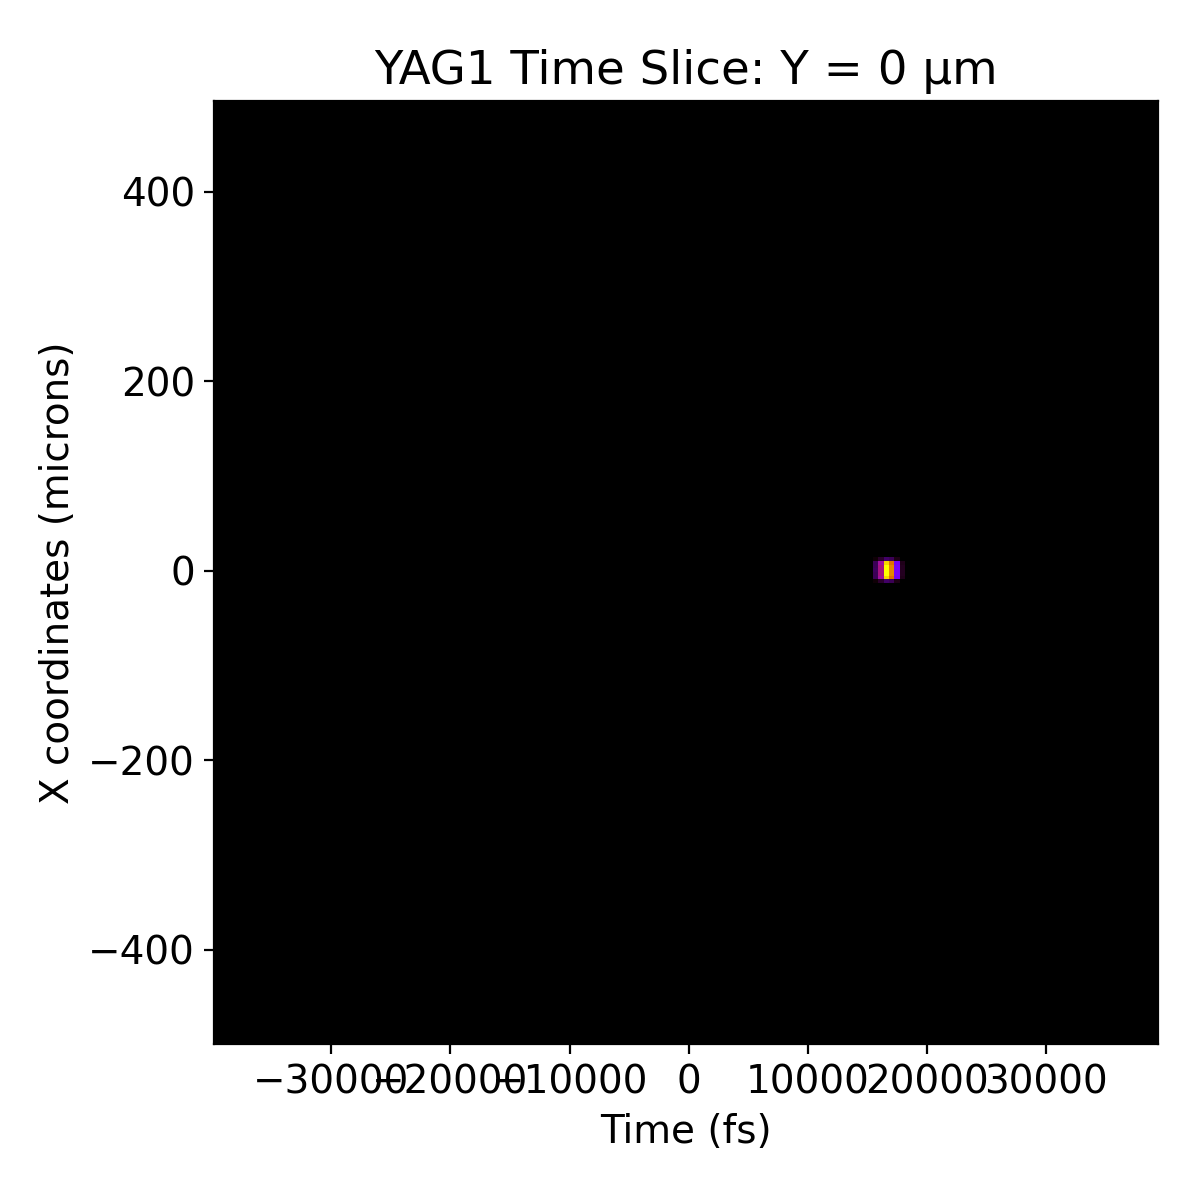

128


<IPython.core.display.Javascript object>


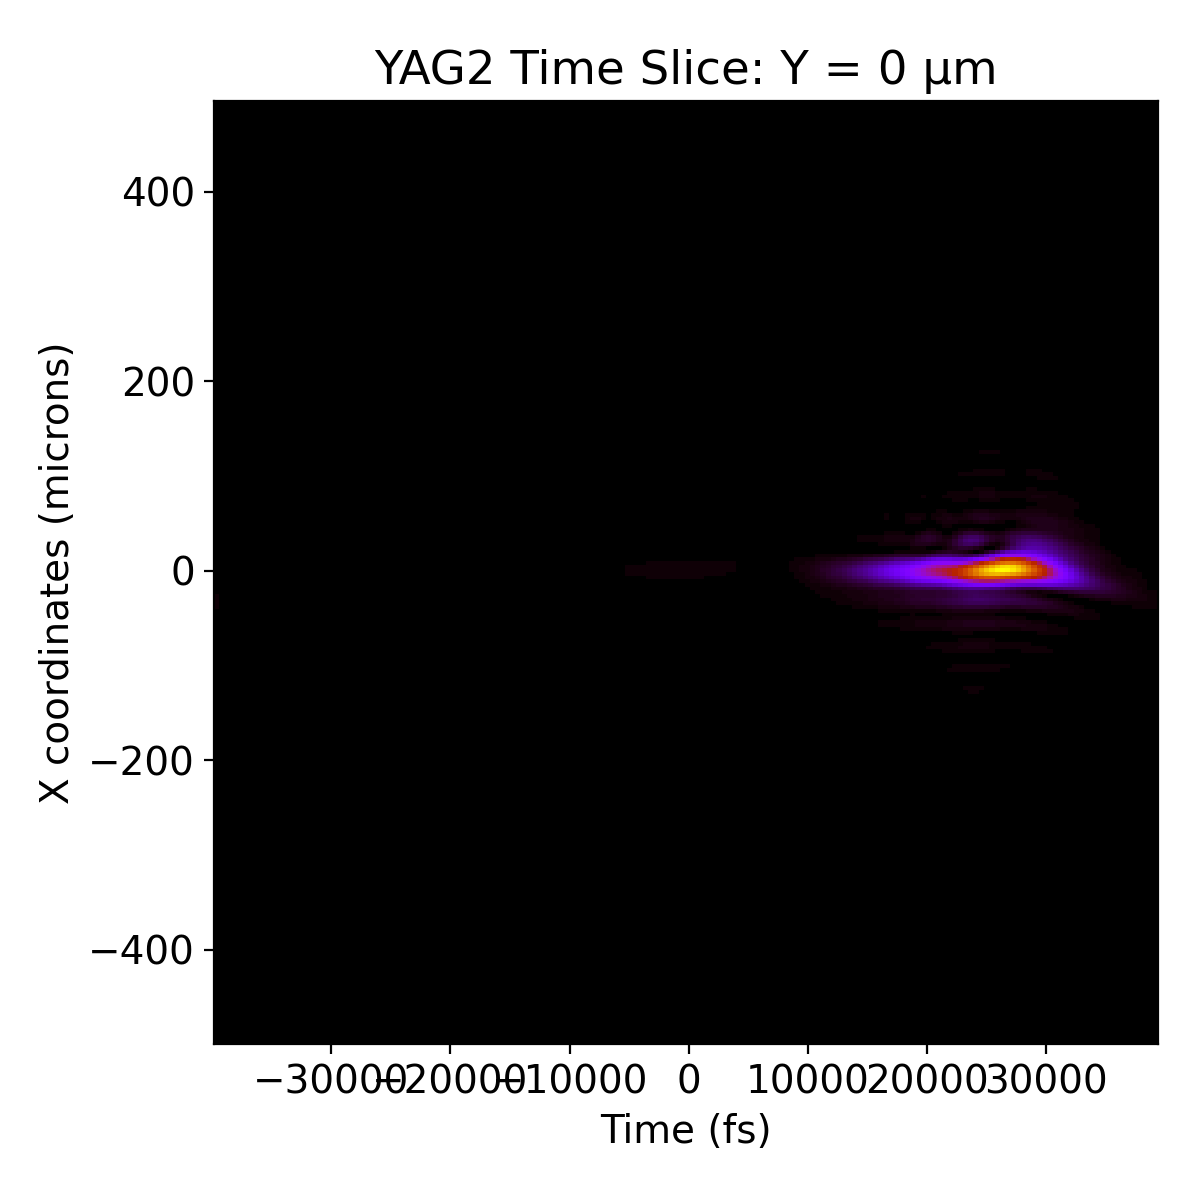

128


<IPython.core.display.Javascript object>


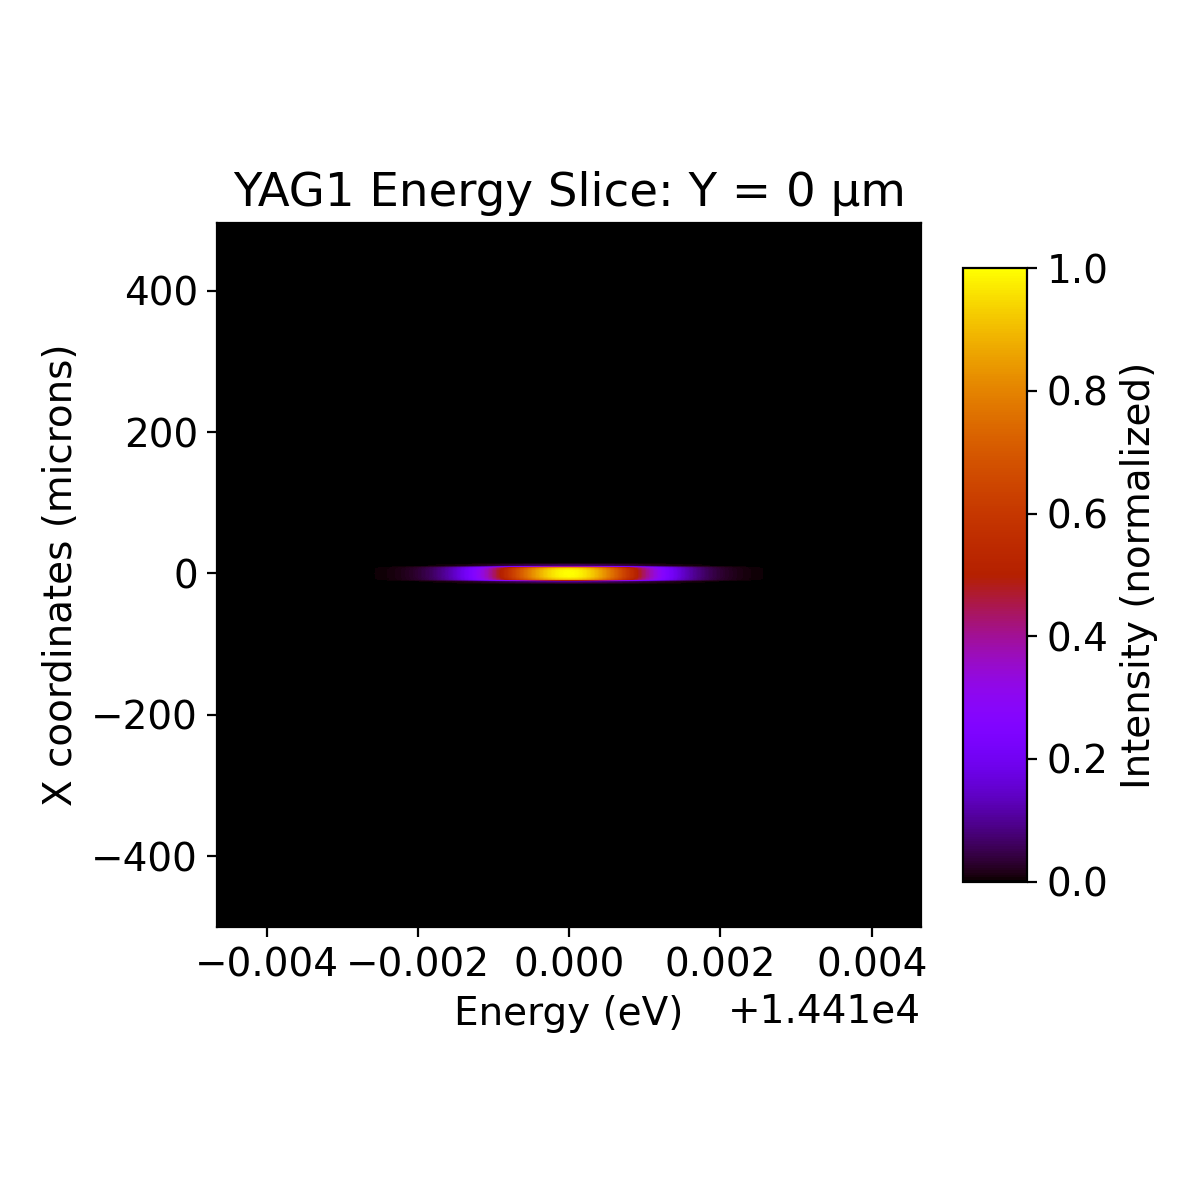

<IPython.core.display.Javascript object>


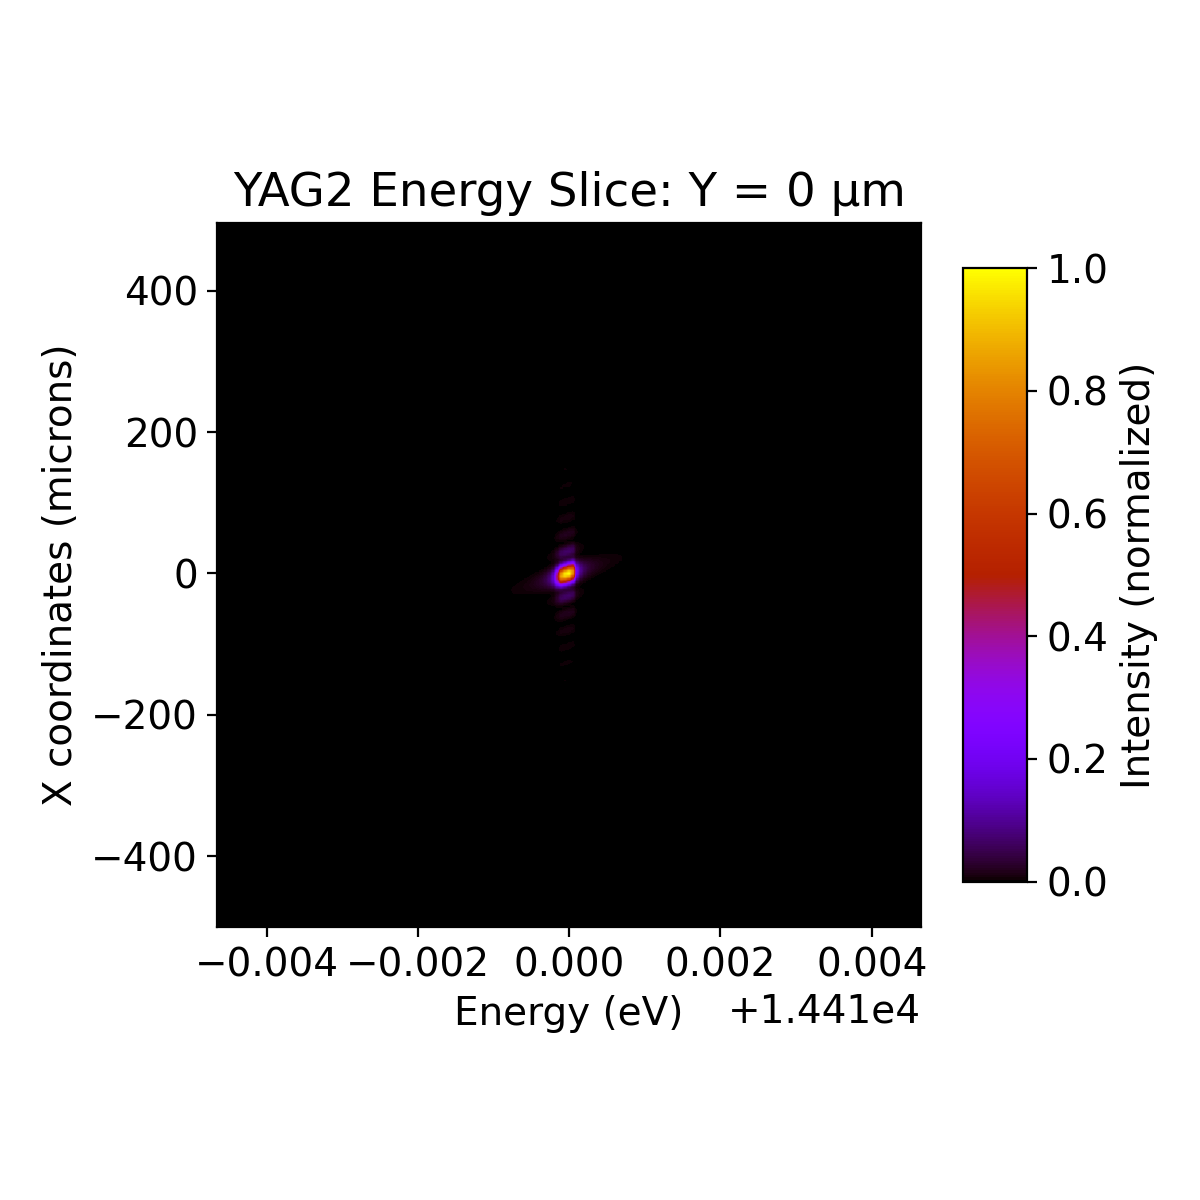

<IPython.core.display.Javascript object>


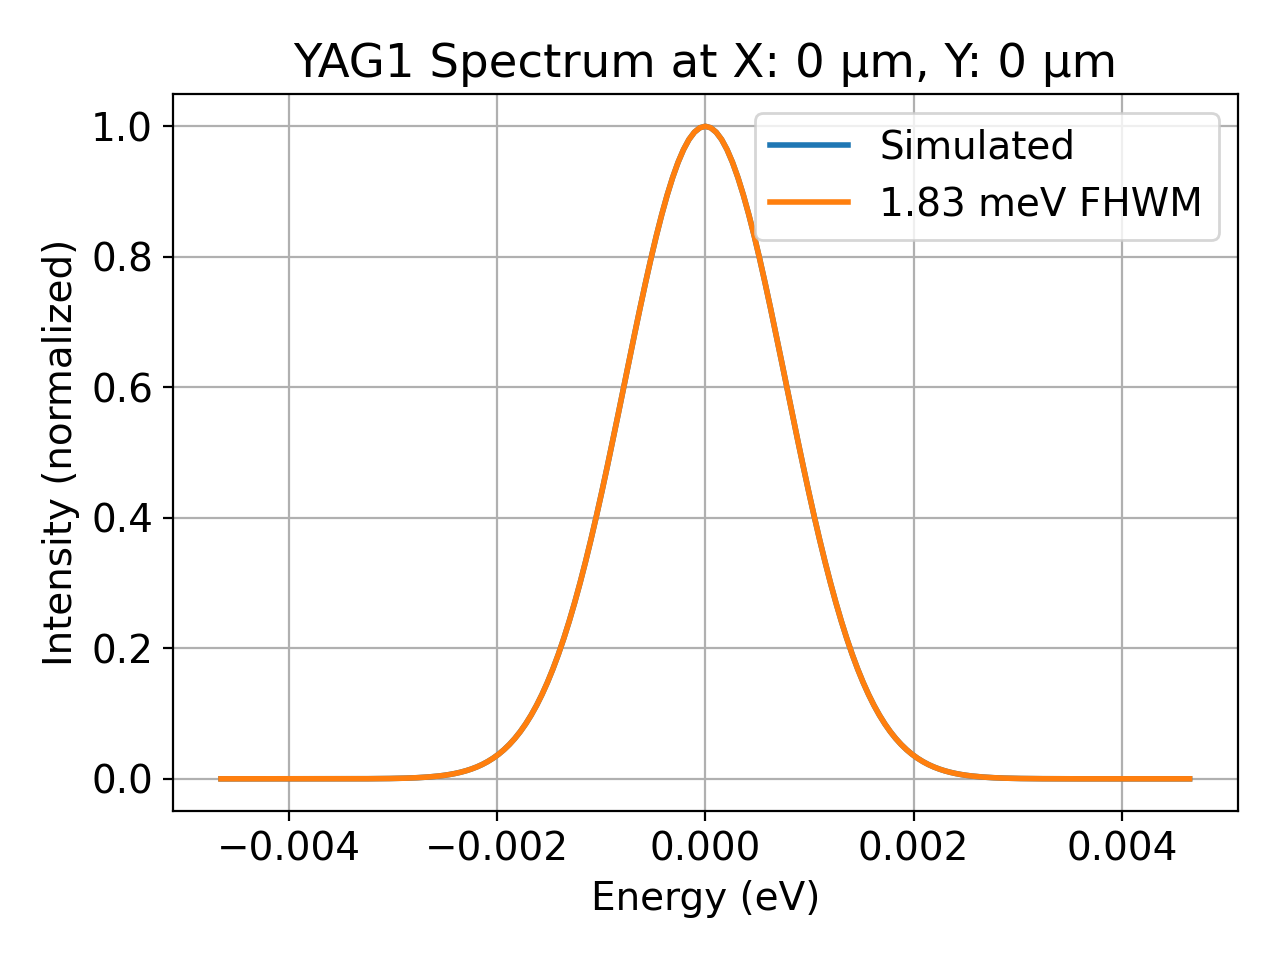

<IPython.core.display.Javascript object>


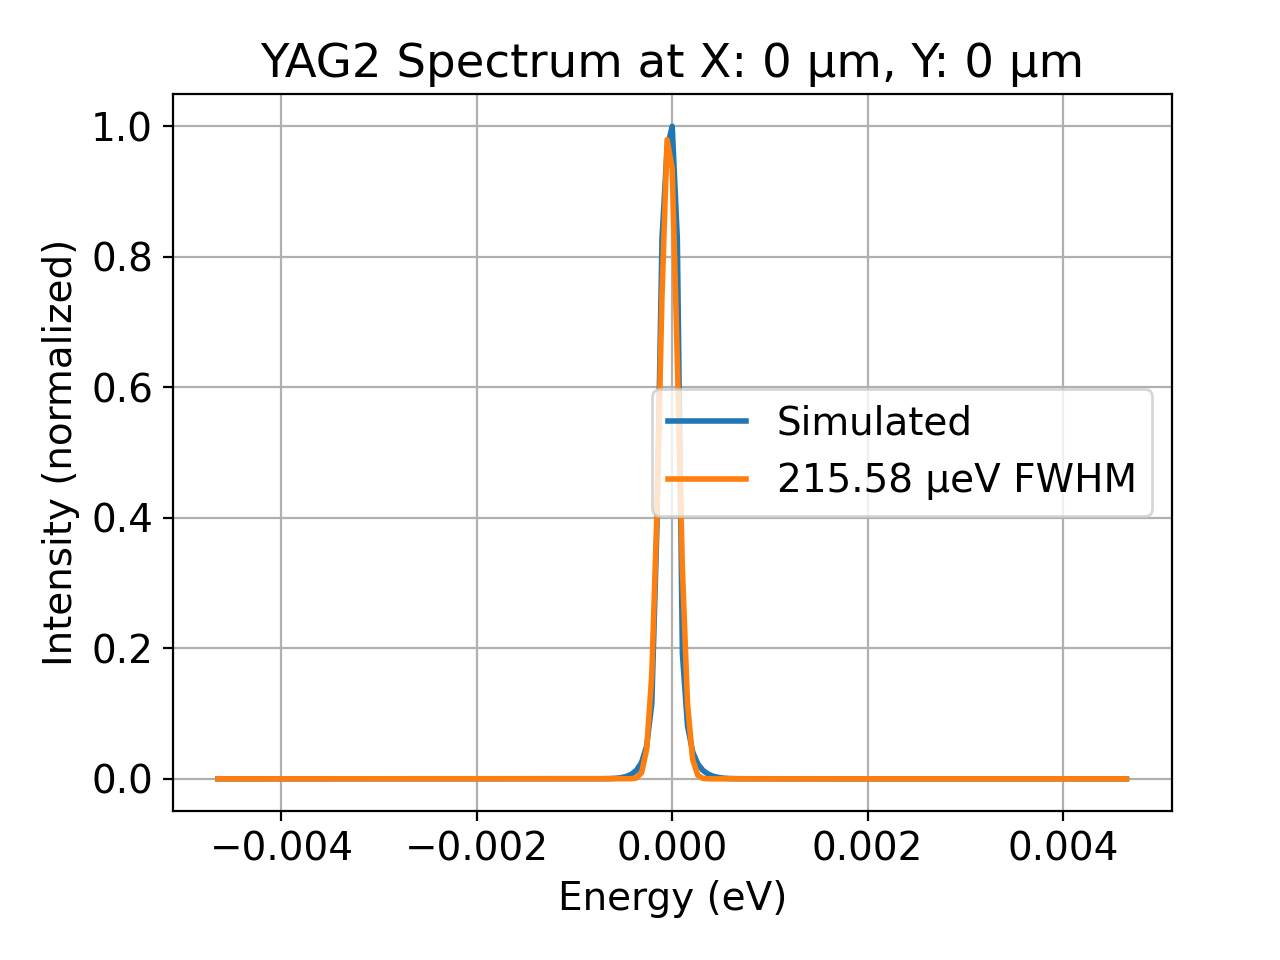

<IPython.core.display.Javascript object>


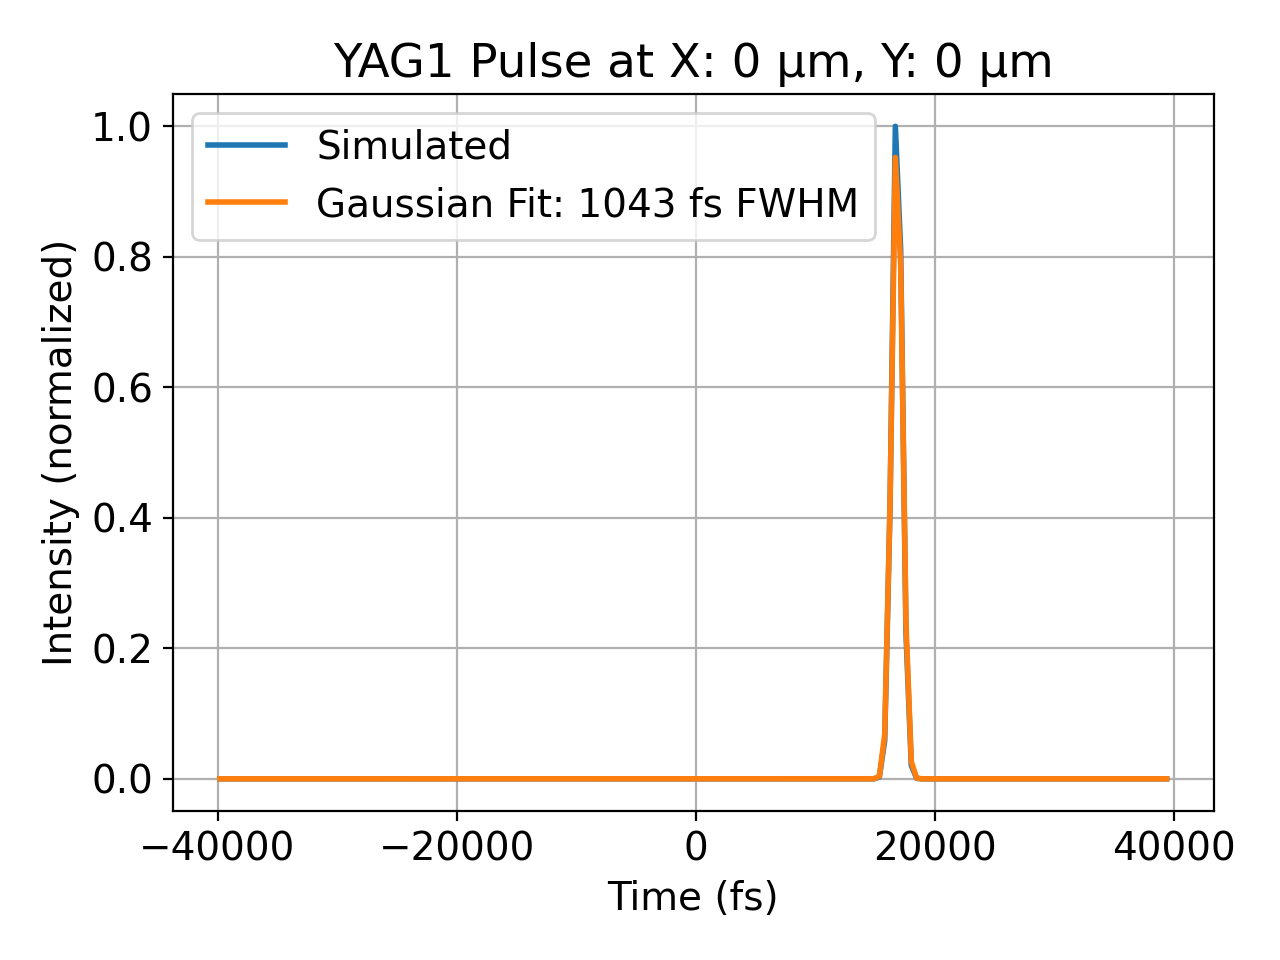

<IPython.core.display.Javascript object>


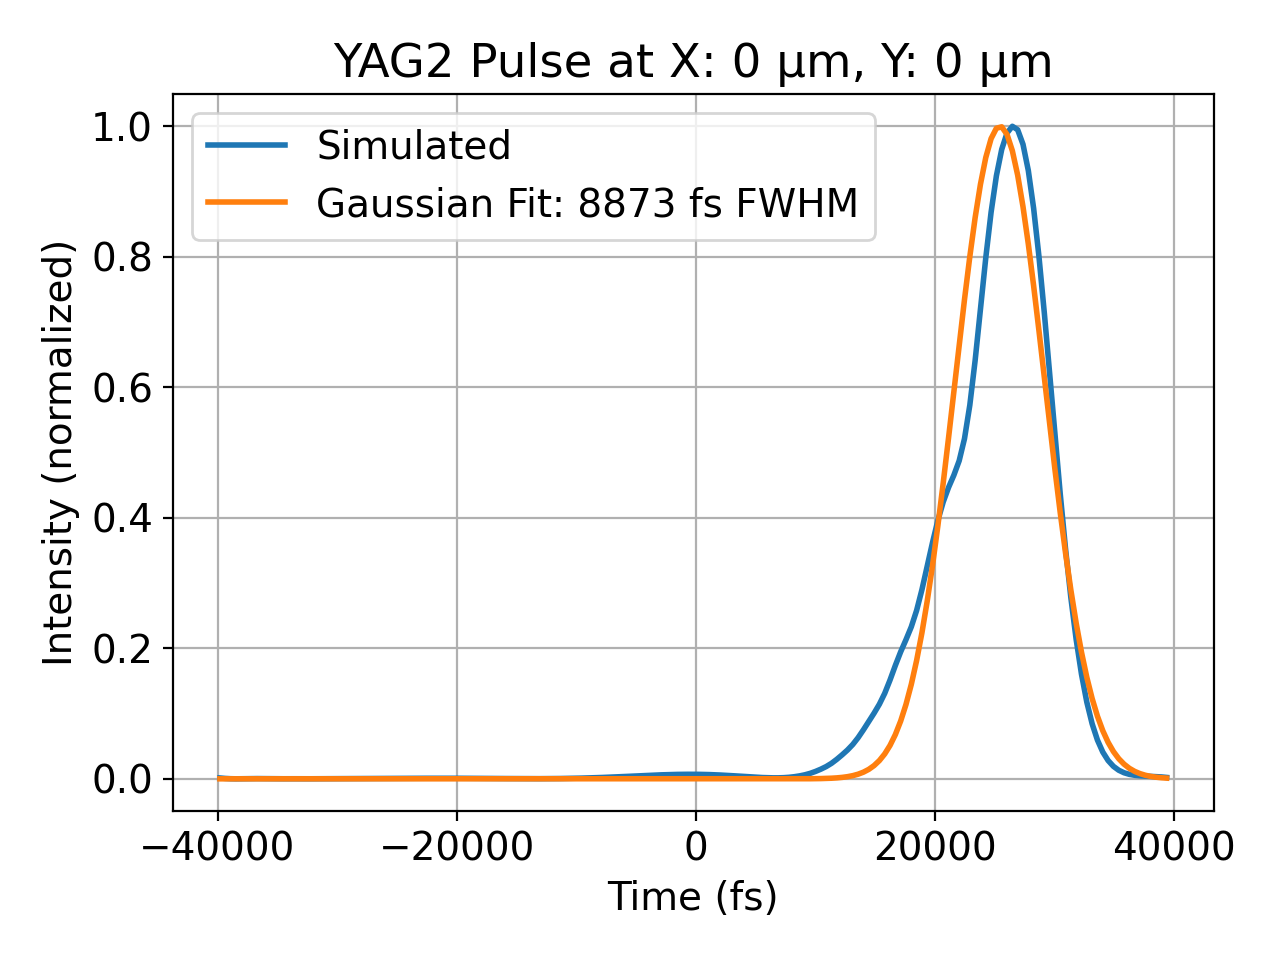

In [53]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8